# Actividad - Ecuaciones diferenciales

1. Resolver numéricamente con `solve_ivp` la siguiente ecuación diferencial:
$$\frac{dx}{dt}=\frac{x}{t+1}$$

In [27]:
from scipy.integrate import solve_ivp, odeint
import matplotlib.pyplot as plt
import numpy as np

In [28]:
def f(x, t) : 
    return x / (t + 1)

In [29]:
tspan = [0, 50]
x0 = np.array([0.5])
X = solve_ivp(f, tspan, x0)

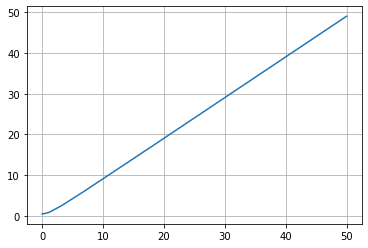

In [30]:
plt.plot(X.t, X.y[0,:])
plt.grid()

Grafique con condición inicial $x_0 = 2$

In [31]:

def f1(x, t) : 
    return x / (t + 1)
tspan = [0, 50]

x0 = np.array([2])
X = solve_ivp(f1, tspan, x0)

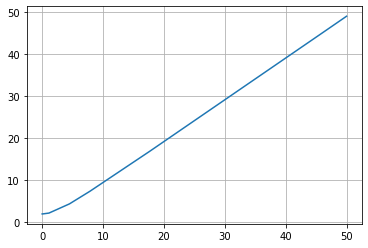

In [32]:
plt.plot(X.t, X.y[0,:])
plt.grid()

2. Encuentre la solución numérica para un oscilador armónico simple:

$$
\frac{d^2 x}{dt^2} +  \omega_{0}^2 x = 0.
$$
Donde $x_0=0.5$, $\dot{x}_0=0.1$ y $\omega_0=3$.

2.1 Defina una función, cuyos argumentos de entrada sean:


1. el tiempo $t$,
2. el arreglo $[x,\dot{x}]$.

Y la salida:

1. el arreglo $[\dot{x},\ddot{x}]$.

  Considerando el argumento de la frecuencia natural $\omega_0$ debe ser una variable global.

In [33]:
# x0 = posicion 
#x0^* = velocidad 

In [47]:
def dx(t, X) :
    return ([X[1],-(w0**2)*X[0]]) 
tspan = [0, 50]
w0 = 3
X = np.array([0.5, 0.1])
sol = solve_ivp(dx, tspan, X, max_step = 0.01)

In [48]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 30008
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.000e+00, 1.000e-02, 2.000e-02, ..., 4.999e+01, 5.000e+01,
       5.000e+01])
 t_events: None
        y: array([[0.5       , 0.50077487, 0.50109907, ..., 0.31422891, 0.32579619,
        0.32579619],
       [0.1       , 0.05496175, 0.00987404, ..., 1.17104301, 1.14223972,
        1.14223972]])
 y_events: None

Grafique

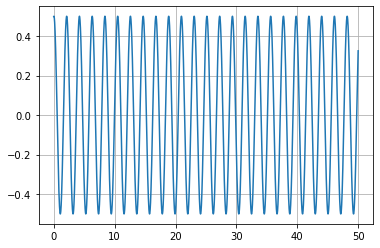

In [49]:
plt.plot(sol.t, sol.y[0,:])
plt.grid()

Asigne a los parámetros de la solución analítica $C_1=x_0$ y $C_2=\frac{\dot{x}_0}{\omega_0}$.

In [50]:
from ipywidgets import *

In [54]:
def posicion(t, wo, X0, v0) :
    A = X0
    B = v0 / wo
    return A * np.cos(wo * t) + B * np.sin(w0 * t)

def grafico(t = 0, l = 1, X0 = 0.5, v0 = 0.1) : 
    g = 9.81
    w0 = np.sqrt( g / 1)
    X = posicion(t, w0, X0, v0)
    print(X)
    x = l * np.sin(X)
    y = -l * np.cos(X)
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot([-1.1, 1.1], [0, 0], "k", lw = 4)
    ax.plot(0, 0, "xr", ms = 20)
    ax.plot(x, y, "ob", ms = 20)
    ax.plot([0, x], [0, y], "b", lw = 4)       
    
    plt.xlim([-1.1, 1.1])
    plt.ylim([-0.1, 0.1])
interact(grafico, t = (0, 10, 0.1), l = fixed(1), X = fixed(0.5), v0 = fixed(0.1))



interactive(children=(FloatSlider(value=0.0, description='t', max=10.0), FloatSlider(value=0.5, description='X…

<function __main__.grafico(t=0, l=1, X0=0.5, v0=0.1)>

Redefina la función para graficarla (con la palabra reservada ***def***) en un intervalo de tiempo de 0 a 10 segundos. Comparela en un mismo grafico con la solución numérica obtenida.

In [56]:
plt.figure()
plt.plot(sol_x.t, sol_analitica, lw = 5, label = "solución analítica")
plt.plot(sol_x.t, sol_x.y[0,:], "r", label = "Solución numérica")
plt.grid()



NameError: name 'sol_x' is not defined

<Figure size 432x288 with 0 Axes>